In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

In [13]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [14]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [15]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.83e-239
Time:                        20:06:15   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [16]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [17]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [18]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           6.30e-27
Time:                        20:08:57   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [19]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


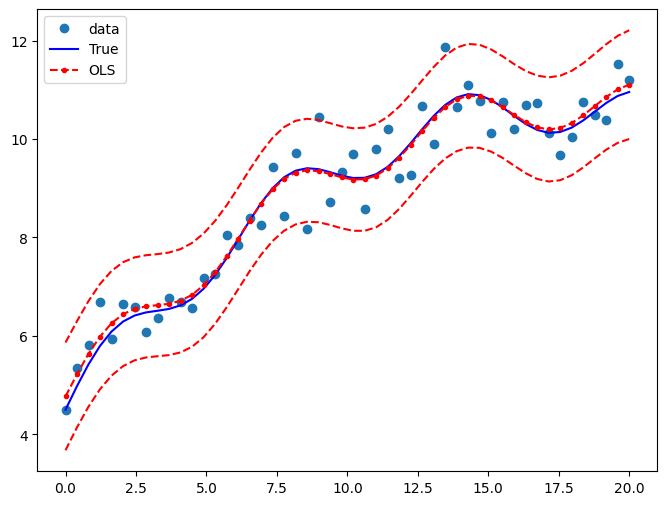

In [20]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

In [21]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1.0, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [22]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           5.69e-38
Time:                        20:09:49   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

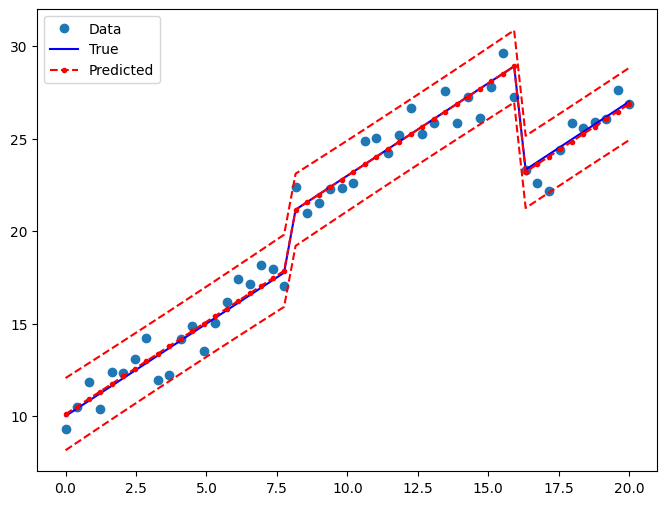

In [24]:
pred_ols2 = res2.get_prediction()
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")